In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
#Load Family Guy Dataset
df = pd.read_csv('Family Guy Dataset.csv')

In [4]:
#Title of episodes
titles = df[['Title of the Episode']]
print(titles)

         Title of the Episode
0          Death Has a Shadow
1    I Never Met the Dead Man
2    Chitty Chitty Death Bang
3            Mind Over Murder
4       A Hero Sits Next Door
..                        ...
395              The Stewaway
396                Get Stewie
397           Carny Knowledge
398             The Candidate
399            Love Story Guy

[400 rows x 1 columns]


In [5]:
#Synopsys of each episode
synopsys = df[['Synopsys']]
print(synopsys)

                                              Synopsys
0    Peter applies for welfare to support his famil...
1    Peter has become addicted to television. While...
2    Peter accidentally loses the reservation for S...
3    Stewie has begun teething; Lois explains to hi...
4    After Peter injures the Happy-Go-Lucky Toy Fac...
..                                                 ...
395  During a fundraiser at his daycare, Stewie is ...
396  Stewie becomes a fan of Mary Elizabeth Becca R...
397  During a "Generation Gap" game at the Quahog F...
398  Peter, Quagmire, Cleveland, and Joe discover a...
399  Arriving late at The Drunken Clam, Peter expla...

[400 rows x 1 columns]


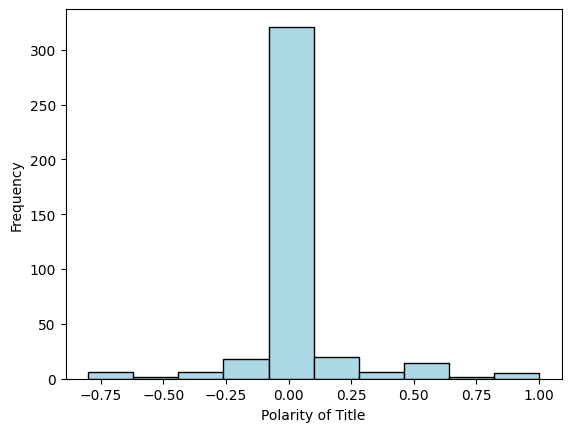

In [6]:
#Sentiment Analysis for Synopsys using Textblob
sat = []
for index, row in titles.iterrows():
    t = row['Title of the Episode']
    analysis = TextBlob(t)
    sentiment = ''
    if analysis.sentiment.polarity > 0:
        sentiment = 'Positive'
    elif analysis.sentiment.polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    sat.append([analysis.sentiment.polarity, analysis.sentiment.subjectivity, sentiment])

sat = pd.DataFrame(sat, columns=['Polarity', 'Subjectivity', 'Sentiment'])

plt.hist(sat['Polarity'], color='lightblue', ec='black')
plt.xlabel('Polarity of Title')
plt.ylabel('Frequency')
plt.show()

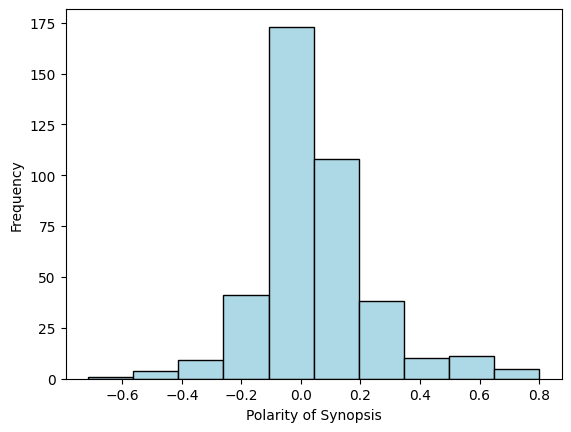

In [7]:
#Sentiment Analysis for Synopsys usingTextblob
sas = []
for index, row in synopsys.iterrows():
    s = row['Synopsys']
    analysis = TextBlob(s)
    sentiment = ''
    if analysis.sentiment.polarity > 0:
        sentiment = 'Positive'
    elif analysis.sentiment.polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    sas.append([analysis.sentiment.polarity, analysis.sentiment.subjectivity, sentiment])

sas = pd.DataFrame(sas, columns=['Polarity', 'Subjectivity', 'Sentiment'])

plt.hist(sas['Polarity'], color='lightblue', ec='black')
plt.xlabel('Polarity of Synopsis')
plt.ylabel('Frequency')
plt.show()

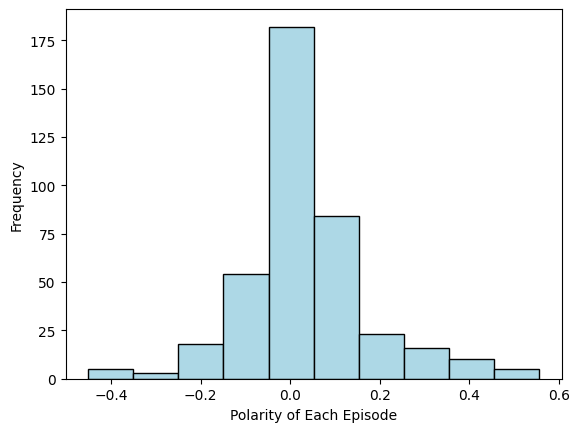

In [26]:
#Average Sentiment for each episode using the above analyses
avg_sa = (sas['Polarity'] + sat['Polarity']) / 2
sent = []

for v in avg_sa:
    if v > 0:
        sent.append('Positive')
    elif v < 0:
        sent.append('Negative')
    else:
        sent.append('Neutral')

plt.hist(avg_sa, color='lightblue', ec='black')
plt.xlabel('Polarity of Each Episode')
plt.ylabel('Frequency')
plt.show()

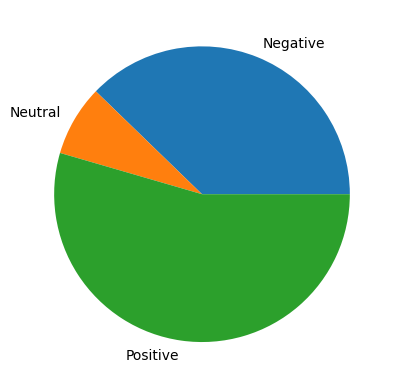

In [27]:
sent = pd.DataFrame(sent, columns=['Sentiment'])
sent = sent.groupby('Sentiment').size().reset_index(name='Count')

plt.pie(sent['Count'], labels = sent['Sentiment'])
plt.show()

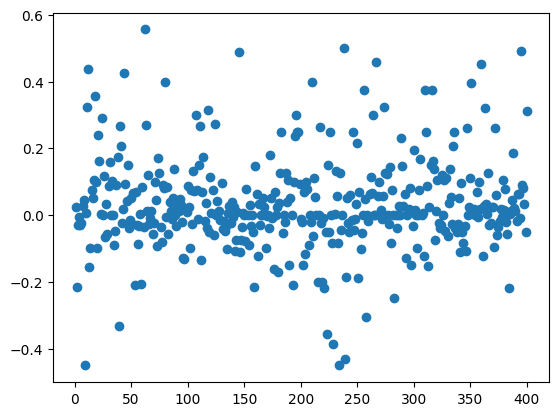

In [10]:
# Polarity -1 (Negative) to 1 (Positive)
plt.scatter(df['No. of Episode (Overall)'], avg_sa)
plt.show()